In [1]:
### data
import pandas as pd
import numpy as np

### APIs
import tweepy

## Plots
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sea
get_ipython().magic('matplotlib inline')

# Sentiment analysis
from textblob import TextBlob
import re, os, json

In [2]:
with open(os.path.join(os.getcwd(),"data/credentials.json")) as data_file:    
    key = json.load(data_file)

#print key["API_KEY"], key["API_SECRET"], key["ACCESS_TOKEN"], key["ACCESS_TOKEN_SECRET"]

In [3]:
def twitter_setup():
    #authentication
    auth = tweepy.OAuthHandler(key["API_KEY"], key["API_SECRET"])
    auth.set_access_token(key["ACCESS_TOKEN"], key["ACCESS_TOKEN_SECRET"])    
    return tweepy.API(auth)

extractor = twitter_setup()



In [57]:
tweets = extractor.user_timeline(screen_name="cdvel", count=200)
print ("No. tweets extracted: {}\n".format(len(tweets)))

No. tweets extracted: 200



In [58]:
print ("Latest 5 tweets")
for tweet in tweets[:5]:
    print (tweet.text)
    print()


Latest 5 tweets
Brilliant: AI Wasting Time of Scammers https://t.co/kFHkwDIUe8 #ArtificialIntelligence #scams #marketing (Re:scam i… https://t.co/lXFEg2isTS
()
The Use of AI in Banking is Set to Explode https://t.co/TjyBizcJ0k
 #marketing #technology #ArtificialIntelligence… https://t.co/NyHh1VTiuB
()
10 Ways To Market Your Ecommerce Site | Marketing Insider Group https://t.co/hKq1PgnFNM
 #digitalmarketing… https://t.co/dVCF6phMiF
()
CCO Opens the Idea Garage for Inspiring B2B and B2C Content Marketing Examples
https://t.co/YKY1h6Seyg
 #geberconsulting #contentmarketing
()
You can no longer tell real videos from fake ones! Say hello to the era of voice and image cloning… https://t.co/CripjnU4Kf
()


In [59]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
data['length']  = np.array([len(tweet.text) for tweet in tweets])
data['id']   = np.array([tweet.id for tweet in tweets])
data['created'] = np.array([tweet.created_at for tweet in tweets])
data['source'] = np.array([tweet.source for tweet in tweets])
data['no_likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['no_retweets'] = np.array([tweet.retweet_count for tweet in tweets])
data['slug'] = np.array([''.join([tweet.user.screen_name, '/status/', str(tweet.id)])  for tweet in tweets])


#print tweet
display(data.head(10))

,Tweets,length,id,created,source,no_likes,no_retweets,slug
0,Brilliant: AI Wasting Time of Scammers https:/...,140,955418537291649024,2018-01-22 12:35:04,Meet Edgar,0,0,MHiesboeck/status/955418537291649024
1,The Use of AI in Banking is Set to Explode htt...,139,955417051413262336,2018-01-22 12:29:10,Crowdfire - Go Big,0,0,MHiesboeck/status/955417051413262336
2,10 Ways To Market Your Ecommerce Site | Market...,131,955416020205924353,2018-01-22 12:25:04,Crowdfire - Go Big,0,0,MHiesboeck/status/955416020205924353
3,CCO Opens the Idea Garage for Inspiring B2B an...,138,955416020101009408,2018-01-22 12:25:04,Crowdfire - Go Big,0,0,MHiesboeck/status/955416020101009408
4,You can no longer tell real videos from fake o...,123,955410393761026048,2018-01-22 12:02:43,Meet Edgar,0,0,MHiesboeck/status/955410393761026048
5,AI Startup Embodied Intelligence Wants Robots ...,138,955405976957521921,2018-01-22 11:45:10,Meet Edgar,0,1,MHiesboeck/status/955405976957521921
6,RT @xlxnrxyhxrn: “The Intellectual Yet Idiot” ...,112,955405621251096577,2018-01-22 11:43:45,Twitter for iPhone,0,5,MHiesboeck/status/955405621251096577
7,Biggest Pain in Machine Learning? Dirty Spread...,115,955403421061918721,2018-01-22 11:35:00,Meet Edgar,0,0,MHiesboeck/status/955403421061918721
8,Survey: Brands Aren't Ready to Commit to Nativ...,136,955400966089650176,2018-01-22 11:25:15,Crowdfire - Go Big,0,0,MHiesboeck/status/955400966089650176
9,New Laser Technique Promises Photonic Devices ...,125,955396881118580736,2018-01-22 11:09:01,Meet Edgar,2,1,MHiesboeck/status/955396881118580736


In [60]:
mean_length = np.mean(data['length'])

print("Tweet's avg length: {}".format(mean_length))

likes_max = np.max(data['no_likes'])
retweets_max = np.max(data['no_retweets'])

most_likes = data[data.no_likes == likes_max].index[0]
most_retweets = data[data.no_retweets == retweets_max].index[0]

print ("\nMost liked: \n> {} length={} ♡={}".format(data['Tweets'][most_likes].encode('utf-8'), data['length'][most_likes], likes_max))
print ("\nMost retweeted: \n> {} length={} RTs={}".format(data['Tweets'][most_retweets].encode('utf-8'), data['length'][most_retweets], retweets_max))

Tweet's avg length: 120.125

Most liked: 
> 7 emerging technologies that have changed the #Enterprise https://t.co/pPAiEepI3R  #AI #AR #Blockchain #Drones #IoT… https://t.co/FNkAgVTCw2 length=140 ♡=12

Most retweeted: 
> RT @IoTRecruiting: The Ramifications of Not Accepting Industry 4.0 - https://t.co/ovdQCAbyJP #Industry40 #IndustrialInternet #IIoT #IOT #Io… length=140 RTs=195


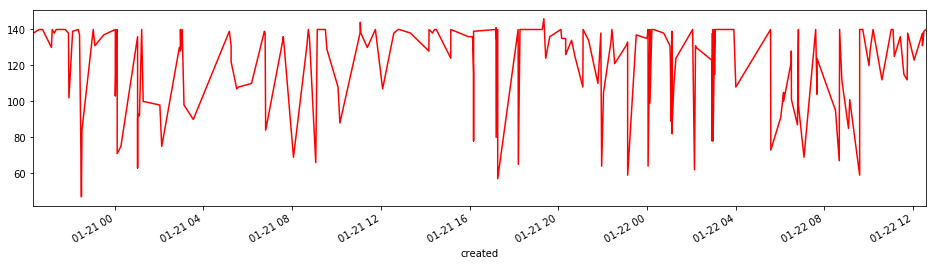

In [61]:
series_length = pd.Series(data=data['length'].values, index=data['created'])
series_likes  = pd.Series(data=data['no_likes'].values, index=data['created'])
series_retweets = pd.Series(data=data['no_retweets'].values, index=data['created'])

series_length.plot(figsize=(16,4), color='r')

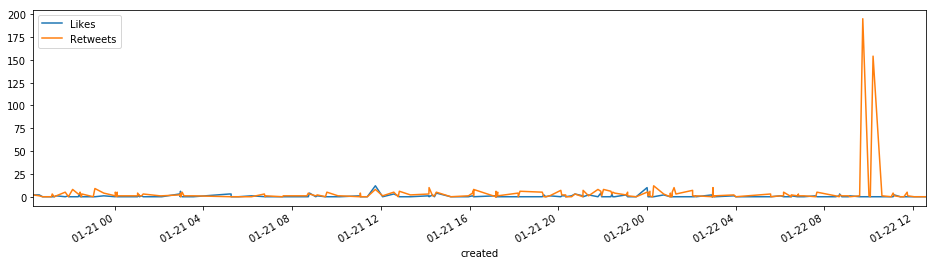

In [62]:
series_likes.plot(figsize=(16,4), label='Likes', legend=True)
series_retweets.plot(figsize=(16,4), label='Retweets', legend=True)

In [63]:
all_sources = []
for source in data['source']:
    all_sources.append(str(source))

all_sources = list(set(all_sources))    
print("Sources: {}".format(all_sources))


Sources: ['Meet Edgar', 'Crowdfire - Go Big', 'RoundTeam', 'Twitter for iPhone']


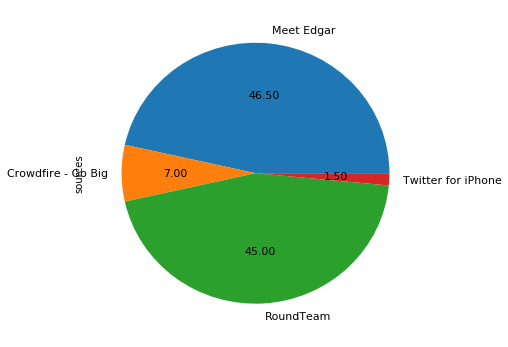

In [64]:
percent = np.zeros(len(all_sources))

for src in data['source']:
    percent[all_sources.index(src)] += 1

percent /= 100

pie_chart = pd.Series(percent, index=all_sources, name='sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6,6))

In [65]:
def analyse(tweet):
    analysis = TextBlob(tweet)
    return  1 if analysis.polarity > 0 else 0 if analysis.polarity == 0 else -1

data['sentiment'] = np.array([analyse(tweet) for tweet in data['Tweets']])

display(data.head(10))

,Tweets,length,id,created,source,no_likes,no_retweets,slug,sentiment
0,Brilliant: AI Wasting Time of Scammers https:/...,140,955418537291649024,2018-01-22 12:35:04,Meet Edgar,0,0,MHiesboeck/status/955418537291649024,1
1,The Use of AI in Banking is Set to Explode htt...,139,955417051413262336,2018-01-22 12:29:10,Crowdfire - Go Big,0,0,MHiesboeck/status/955417051413262336,0
2,10 Ways To Market Your Ecommerce Site | Market...,131,955416020205924353,2018-01-22 12:25:04,Crowdfire - Go Big,0,0,MHiesboeck/status/955416020205924353,0
3,CCO Opens the Idea Garage for Inspiring B2B an...,138,955416020101009408,2018-01-22 12:25:04,Crowdfire - Go Big,0,0,MHiesboeck/status/955416020101009408,1
4,You can no longer tell real videos from fake o...,123,955410393761026048,2018-01-22 12:02:43,Meet Edgar,0,0,MHiesboeck/status/955410393761026048,-1
5,AI Startup Embodied Intelligence Wants Robots ...,138,955405976957521921,2018-01-22 11:45:10,Meet Edgar,0,1,MHiesboeck/status/955405976957521921,1
6,RT @xlxnrxyhxrn: “The Intellectual Yet Idiot” ...,112,955405621251096577,2018-01-22 11:43:45,Twitter for iPhone,0,5,MHiesboeck/status/955405621251096577,-1
7,Biggest Pain in Machine Learning? Dirty Spread...,115,955403421061918721,2018-01-22 11:35:00,Meet Edgar,0,0,MHiesboeck/status/955403421061918721,-1
8,Survey: Brands Aren't Ready to Commit to Nativ...,136,955400966089650176,2018-01-22 11:25:15,Crowdfire - Go Big,0,0,MHiesboeck/status/955400966089650176,1
9,New Laser Technique Promises Photonic Devices ...,125,955396881118580736,2018-01-22 11:09:01,Meet Edgar,2,1,MHiesboeck/status/955396881118580736,1


In [66]:
positives = [tweet for index, tweet in enumerate(data['Tweets']) if data['sentiment'][index] > 0]
neutral   = [tweet for index, tweet in enumerate(data['Tweets']) if data['sentiment'][index] == 0]
negatives = [tweet for index, tweet in enumerate(data['Tweets']) if data['sentiment'][index] < 0]

print("👍: {}, 👎: {}, 😐: {} ". format(len(positives), len(negatives), len(neutral)))

👍: 65, 👎: 30, 😐: 105 


### References 
- https://github.com/avisaxena33/Twitter-Data-Sentiment-Analysis-with-Python-Workshop/blob/master/twitter.py

### Notes
oauthlib, textblob for OSX64
- https://anaconda.org/asmeurer/oauthlib
- https://anaconda.org/sloria/textblob
    